In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# from google.cloud import storage
# from google.oauth2 import service_account

import pyspark

In [120]:
sc = pyspark.SparkContext(appName="StormApp").getOrCreate()

In [121]:
df = pd.read_csv("/Users/aatishlobo/Desktop/projDistComp/storm_g2020.csv")

In [122]:
df.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

In [123]:
cols_with_na = df.columns[df.isna().any()]
print(cols_with_na)

Index(['DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'MAGNITUDE', 'MAGNITUDE_TYPE',
       'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH',
       'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS',
       'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION',
       'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON',
       'END_LAT', 'END_LON', 'EVENT_NARRATIVE'],
      dtype='object')


In [124]:
print(df.shape)
df.isna().sum()[df.isna().sum() > 0]

(371544, 51)


DAMAGE_PROPERTY        82221
DAMAGE_CROPS           81608
MAGNITUDE             177768
MAGNITUDE_TYPE        224931
FLOOD_CAUSE           336051
CATEGORY              371327
TOR_F_SCALE           362723
TOR_LENGTH            362723
TOR_WIDTH             362723
TOR_OTHER_WFO         370173
TOR_OTHER_CZ_STATE    370173
TOR_OTHER_CZ_FIPS     370173
TOR_OTHER_CZ_NAME     370173
BEGIN_RANGE           154219
BEGIN_AZIMUTH         154219
BEGIN_LOCATION        154219
END_RANGE             154219
END_AZIMUTH           154219
END_LOCATION          154219
BEGIN_LAT             154219
BEGIN_LON             154219
END_LAT               154219
END_LON               154219
EVENT_NARRATIVE        66486
dtype: int64

In [125]:
index = df.columns.get_loc("STATE")
print(index)

8


In [126]:
index = df.columns.get_loc("EVENT_TYPE")
print(index)

12


In [127]:
rdd = sc.textFile("/Users/aatishlobo/Desktop/projDistComp/storm_g2020.csv")

In [128]:
header = rdd.first()
rdd1 = rdd.filter(lambda x: x != header)

In [129]:
rdd1.getNumPartitions()

11

In [130]:
rdd_split = rdd1.map(lambda x: x.split(","))

In [131]:
# BASED ON DESIRED COLUMNS ABOVE

rdd_SET = rdd_split.map(lambda x: (x[8],x[12]))

In [132]:
rdd_clean = rdd_SET.filter(lambda x: x[0] not in (None, '') and x[1] not in (None, ''))
rdd_clean = rdd_clean.map(lambda x: [x, 1]).reduceByKey(lambda x,y: x+y).map(lambda x: [x[0][0], x[0][1],x[1]])
sorted = rdd_clean.sortBy(lambda x: x[2], ascending=False)

In [133]:
data = rdd_clean.collect()

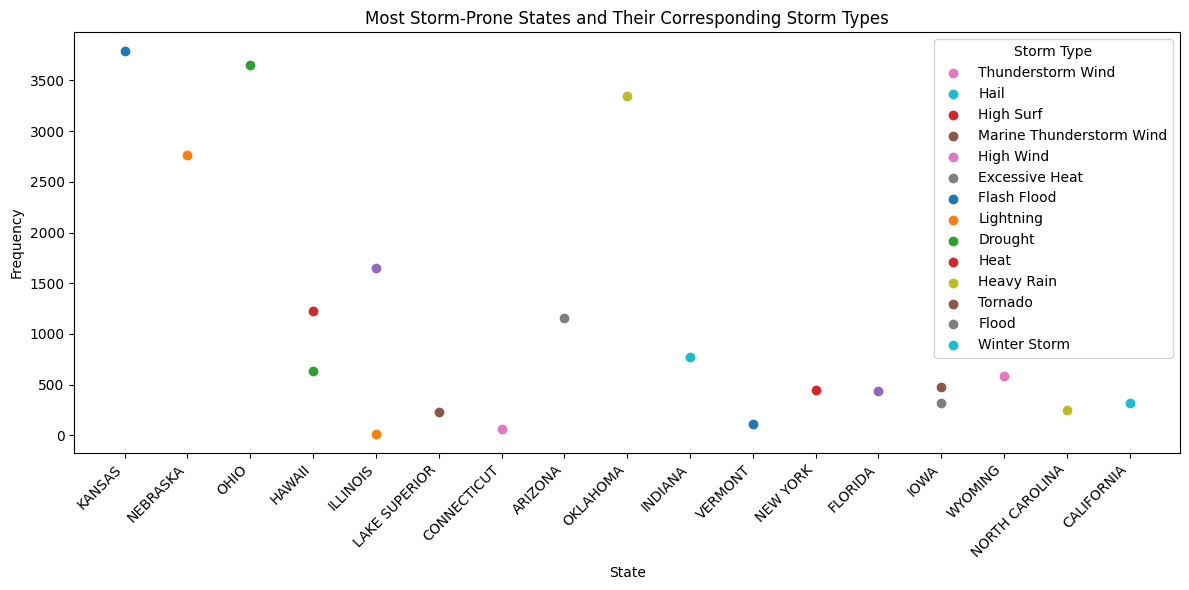

In [134]:
# Only first 20 states
data = data[:20]

states = [row[0] for row in data]
storm_types = [row[1] for row in data]
frequencies = [row[2] for row in data]

# Plot
plt.figure(figsize=(12, 6))
for state, storm_type, freq in data:
    plt.scatter(state, freq, label=storm_type)

# Avoiding Duplicates
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys(), title="Storm Type")

plt.xticks(rotation=45, ha='right')
plt.xlabel("State")
plt.ylabel("Frequency")
plt.title("Most Storm-Prone States and Their Corresponding Storm Types")
plt.tight_layout()
plt.show()

In [135]:
sc.stop()